In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data_1=pd.read_pickle('cleaned_df_final.pkl')
data_1.head()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list
0,196,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,132.5,NaN,Show what you know A,Assessment_A,5,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,"[no, because, you, don't, change, the, denomin...",[],[]
1,197,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,581,NaN,Show what you know A,Assessment_A,6,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,"[i, do, not, know, the, answer]",[],[]
2,723,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,15.75,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,1a,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,"[first, you, need, to, double, the, denominato...",[],[]
3,758,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,0.333,NaN,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,2a,...,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,"[first, multiply, the, denominator, by, two, t...",[],[]
4,801,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,11,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,3a,...,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,"[first, multiply, 8, NUMBER, by, 2, NUMBER, th...","[8, 2]",[]


In [3]:
data_2=pd.read_csv("textResponses_graded.csv")
data_2=data_2[['Transaction Id','correctness','answerType']]
data_2=data_2.iloc[:1450]

In [4]:
data=pd.merge(data_1,data_2,on='Transaction Id')

In [5]:
data['answer']=''
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    temp_answer=''
    for temp_word in temp_word_list:
        temp_answer=temp_answer+temp_word+' '
    temp_answer=temp_answer[:-1]
    data['answer'][i]=temp_answer

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
feature_keyword_list=['fraction','FRACTION','NUMBER','EUQATION','right','correct', 'wrong', 'incorrect',
                   'denominator','equivalent',  'numerator','larger','smaller','bigger',
                  'common','mixed','error','compare','least','subtract','multiply','equal','plus','divide',]

In [7]:
feature_keyword_list=np.load('select_gram_list.npy')

In [8]:
keyword_matrix=[]
for i in range(len(data)):
    temp_answer=data.answer.iloc[i]
    temp_array=[]
    for temp_keyword in feature_keyword_list:
        temp_count=temp_answer.count(temp_keyword)
        temp_array.append(temp_count)
    keyword_matrix.append(temp_array)

In [9]:
import codecs
from sklearn import feature_extraction 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
data.correctness.value_counts()

1    901
0    549
Name: correctness, dtype: int64

In [11]:
data[data.correctness==0].answerType.value_counts()

p    229
n    143
u     75
v     68
c     33
Name: answerType, dtype: int64

In [12]:
data[data.correctness==1].answerType.value_counts()

p     659
c     234
v       6
c       1
Name: answerType, dtype: int64

In [13]:
data.word_list[314]

['15/21',
 'FRACTION',
 'be',
 'bigger',
 'because',
 '15/21',
 'FRACTION',
 'be',
 'bigger',
 'section',
 'than',
 'FRACTION',
 'be',
 'split',
 'into',
 'smaller',
 'section']

In [14]:
data['new_answer']=''
all_answer=[]
for i in range(len(data)):
    for temp_word in data.word_list[i]:
        data.new_answer[i]=data.new_answer[i]+temp_word+' '
    all_answer=all_answer+[data.new_answer[i]]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
data.new_answer[0]

"no because you don't change the denominator so the why the answer be wrong "

In [16]:
all_answer[:10]

["no because you don't change the denominator so the why the answer be wrong ",
 'i do not know the answer ',
 'next time lester need to know the the smaller the fraction the greater it be ',
 'i do not know ',
 "i don't know ",
 'i think she be right because i double check her answer ',
 'in 15/24 FRACTION there be more space to fill up but in 15/21 FRACTION there be less to fill up ',
 'i think her answer be right ',
 'would you want to have 32/65 FRACTION of something or 32/45 FRACTION ',
 'i think the the picture be not correct i think the because you never add the denominator the correct answer would be FRACTION ']

# 2 clusters (with correctness)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(keyword_matrix)
km_predict=kmeans.predict(keyword_matrix)
km_predict

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
for i in range(2):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['answerType'].value_counts()/len(data[data['km_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
p     0.590871
c     0.181741
n     0.120879
u     0.052409
v     0.051564
c     0.000845
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 1
p    0.707865
c    0.194757
u    0.048689
v    0.048689
Name: answerType, dtype: float64
-----------------------------------------


In [20]:
for i in range(2):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['correctness'].value_counts()/len(data[data['km_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
1    0.581572
0    0.418428
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 1
1    0.797753
0    0.202247
Name: correctness, dtype: float64
-----------------------------------------


In [21]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=2, gamma=0.1).fit_predict(keyword_matrix)
sp_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(2):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['answerType'].value_counts()/len(data[data['sp_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')

For Spectral Cluster 0
p     0.612075
c     0.184594
n     0.099237
u     0.051353
v     0.050659
c     0.000694
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 1
p    0.666667
c    0.111111
v    0.111111
u    0.111111
Name: answerType, dtype: float64
-----------------------------------------


D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(2):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['correctness'].value_counts()/len(data[data['sp_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
1    0.621096
0    0.378904
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 1
1    0.666667
0    0.333333
Name: correctness, dtype: float64
-----------------------------------------


In [24]:
data['km_cluster'].value_counts()

0    1183
1     267
Name: km_cluster, dtype: int64

In [25]:
data['sp_cluster'].value_counts()

0    1441
1       9
Name: sp_cluster, dtype: int64

In [26]:
data['answerType'].value_counts()

p     888
c     267
n     143
u      75
v      74
c       1
Name: answerType, dtype: int64

In [27]:
data['correctness'].value_counts()

1    901
0    549
Name: correctness, dtype: int64

In [28]:
from scipy import stats
from scipy.stats import ttest_ind

In [29]:
ttest_ind(data['km_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=1.479794813672159, pvalue=0.18942014965717804)

In [30]:
ttest_ind(data['km_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [31]:
ttest_ind(data['sp_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=1.1590413222947826, pvalue=0.2904785514155903)

In [32]:
ttest_ind(data['sp_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [33]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['km_cluster']), list(data['answerType']), beta=1.0)

(0.046499500958050485, 0.019154213647941586, 0.027132093933094074)

In [34]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['correctness'], beta=1.0)

(0.03363574928692847, 0.024216384555735354, 0.028159246183305703)

In [35]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['sp_cluster']), list(data['answerType']), beta=1.0)

(0.028412253201126857, 0.0009245991708492824, 0.0017909178134472245)

In [36]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['correctness'], beta=1.0)

(0.0007340429414444993, 4.175047806811983e-05, 7.900722784446932e-05)

In [37]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(keyword_matrix)
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(keyword_matrix)

In [39]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(keyword_matrix)
svd_predict

array([[ 4.91213200e+00, -4.47186239e-01,  2.27930704e-01],
       [ 1.62342638e+00, -3.72303397e-01,  1.32901894e-01],
       [ 5.43265417e+00,  1.25154146e+00,  1.49442749e+00],
       ...,
       [ 1.36141457e+00,  5.39063453e-03, -1.92520212e+00],
       [ 2.19264068e+00, -1.86243044e-01,  1.16164196e+00],
       [ 1.36836774e+00,  1.81791705e-01, -2.04506299e+00]])

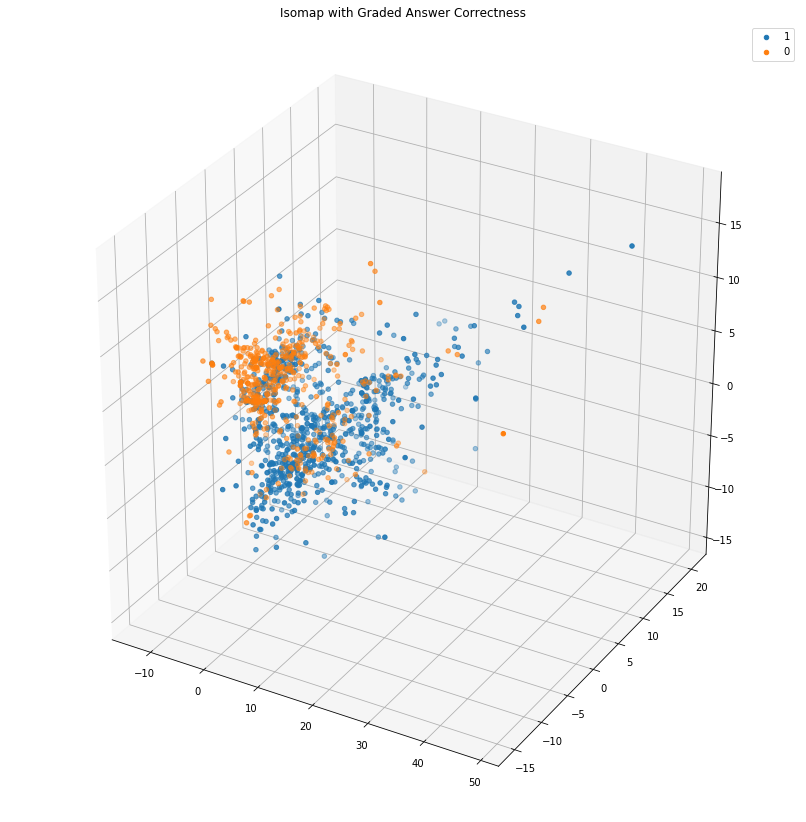

In [40]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Correctness')
plt.show()

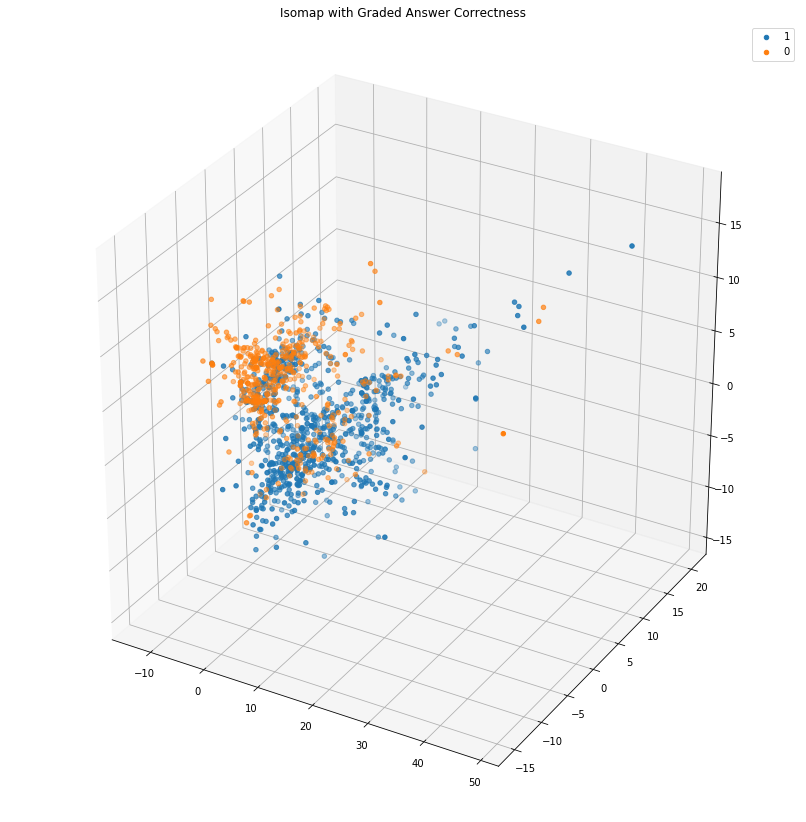

In [41]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Correctness')
plt.show()

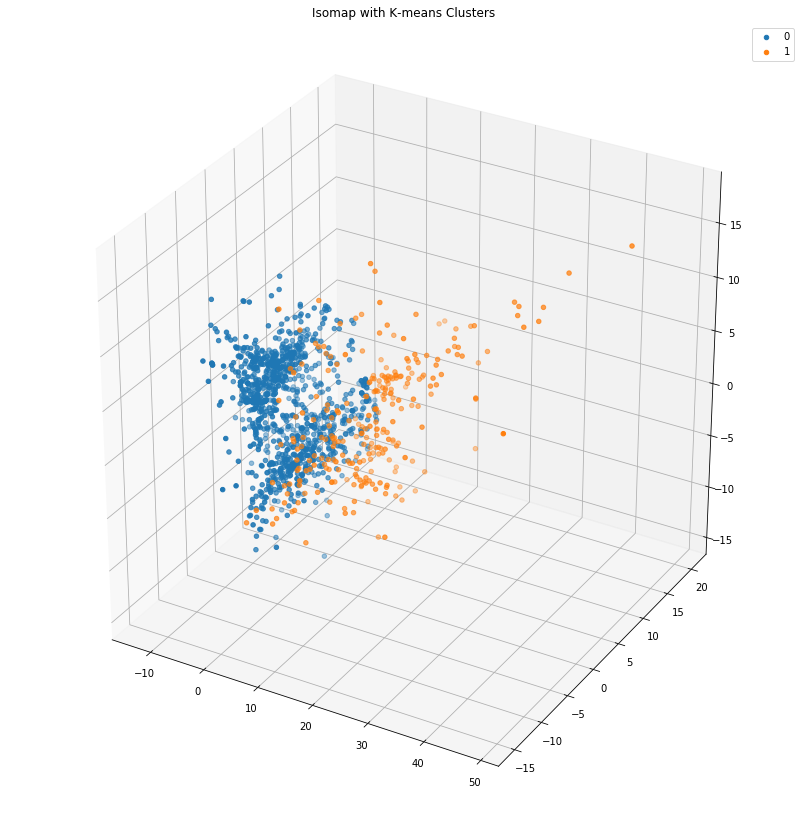

In [42]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

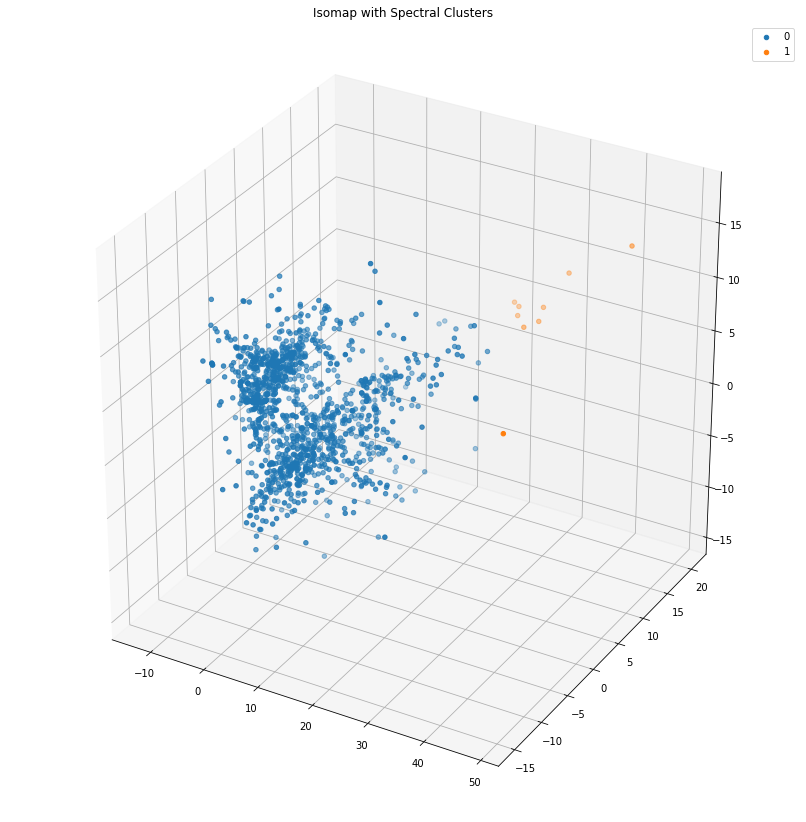

In [43]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

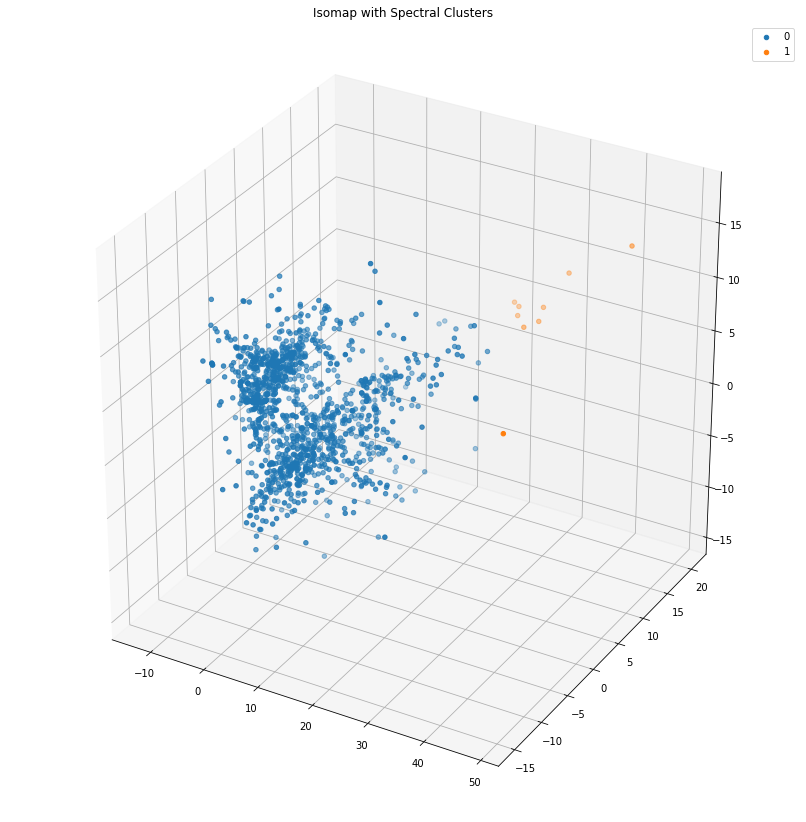

In [44]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

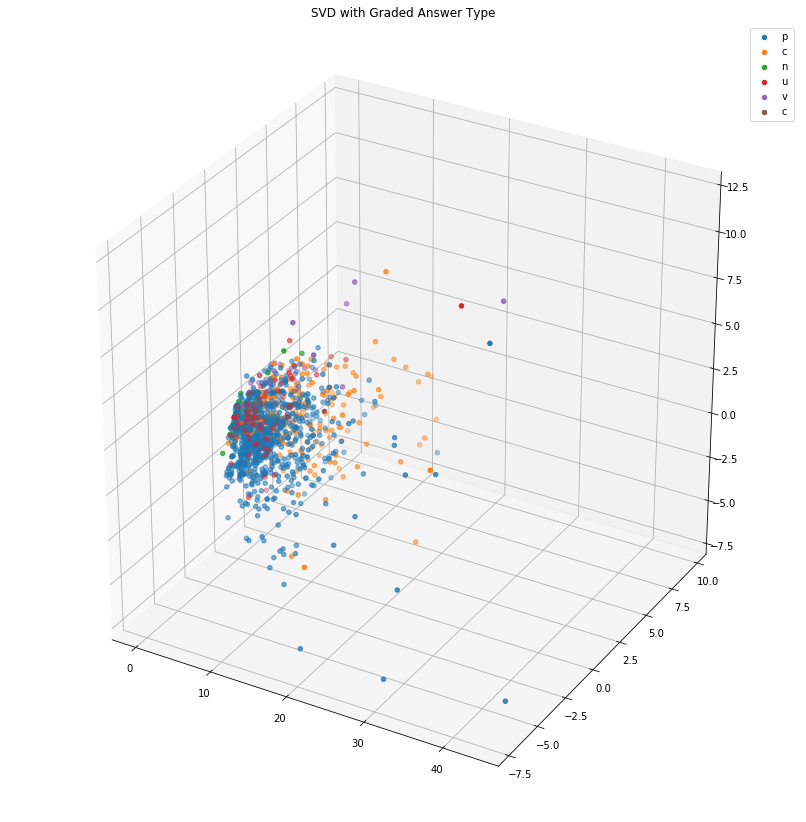

In [45]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['answerType'].value_counts().index:
    mask = data['answerType'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Graded Answer Type')
plt.show()

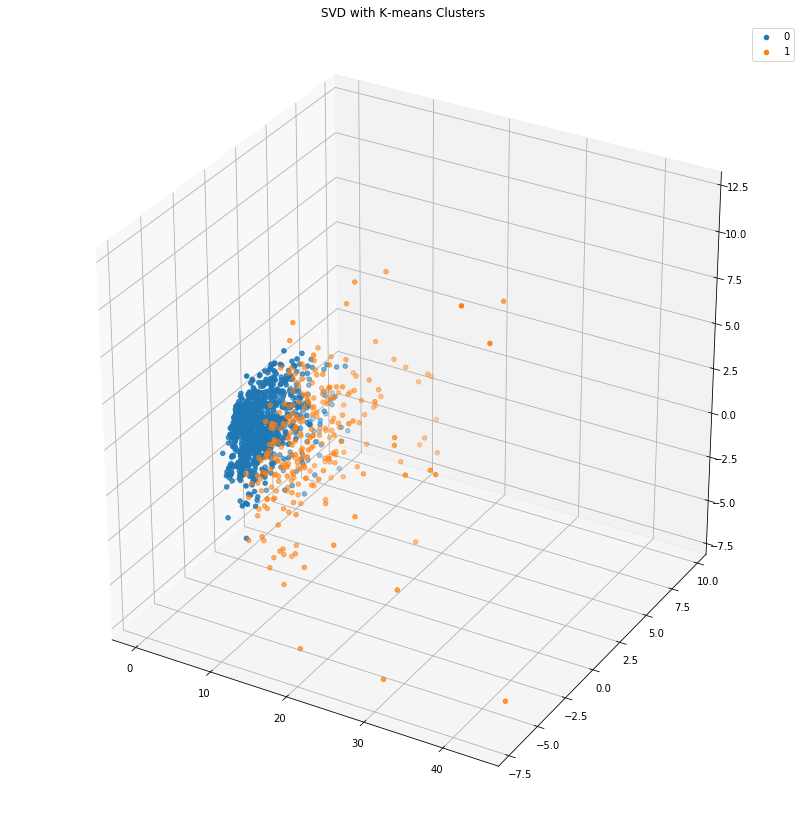

In [46]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

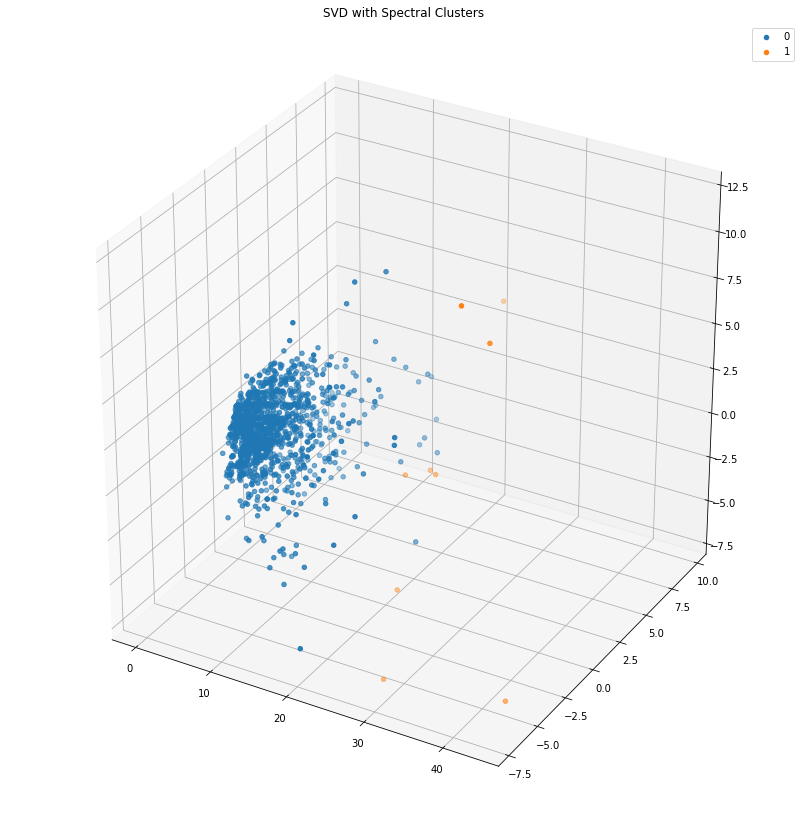

In [47]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()

# 5 clusters (with answer type)

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(keyword_matrix)
km_predict=kmeans.predict(keyword_matrix)
km_predict

array([1, 4, 1, ..., 4, 4, 4])

In [49]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
for i in range(5):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['answerType'].value_counts()/len(data[data['km_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
c     0.531915
p     0.414894
u     0.042553
c     0.010638
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 1
p    0.686117
c    0.140845
v    0.098592
u    0.060362
n    0.010060
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 2
p    0.709677
c    0.238710
v    0.032258
u    0.019355
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 3
p    0.727273
c    0.090909
v    0.090909
u    0.090909
Name: answerType, dtype: float64
-----------------------------------------
For K-means cluster 4
p    0.562771
n    0.199134
c    0.157287
u    0.053391
v    0.027417
Name: answerType, dtype: float64
-----------------------------------------


In [51]:
for i in range(5):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['correctness'].value_counts()/len(data[data['km_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
1    0.734043
0    0.265957
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 1
1    0.700201
0    0.299799
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 2
1    0.858065
0    0.141935
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 3
1    0.727273
0    0.272727
Name: correctness, dtype: float64
-----------------------------------------
For K-means cluster 4
0    0.505051
1    0.494949
Name: correctness, dtype: float64
-----------------------------------------


In [52]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=5, gamma=0.1).fit_predict(keyword_matrix)
sp_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(5):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['answerType'].value_counts()/len(data[data['sp_cluster']==i]['answerType'])
    print(temp_stat)
    print('-----------------------------------------')

For Spectral Cluster 0
p     0.615653
c     0.179595
n     0.099930
u     0.051712
v     0.051013
c     0.000699
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 1
p    0.666667
c    0.111111
v    0.111111
u    0.111111
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 2
c    0.8
p    0.2
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 3
c    1.0
Name: answerType, dtype: float64
-----------------------------------------
For Spectral Cluster 4
c    1.0
Name: answerType, dtype: float64
-----------------------------------------


D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(5):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['correctness'].value_counts()/len(data[data['sp_cluster']==i]['correctness'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
1    0.618449
0    0.381551
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 1
1    0.666667
0    0.333333
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 2
1    1.0
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 3
1    1.0
Name: correctness, dtype: float64
-----------------------------------------
For Spectral Cluster 4
1    1.0
Name: correctness, dtype: float64
-----------------------------------------


In [55]:
data['km_cluster'].value_counts()

4    693
1    497
2    155
0     94
3     11
Name: km_cluster, dtype: int64

In [56]:
data['sp_cluster'].value_counts()

0    1431
1       9
2       5
3       4
4       1
Name: sp_cluster, dtype: int64

In [57]:
data['answerType'].value_counts()

p     888
c     267
n     143
u      75
v      74
c       1
Name: answerType, dtype: int64

In [58]:
data['correctness'].value_counts()

1    901
0    549
Name: correctness, dtype: int64

In [59]:
from scipy import stats
from scipy.stats import ttest_ind

In [60]:
ttest_ind(data['km_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=0.2567812376703014, pvalue=0.8031214372371581)

In [61]:
ttest_ind(data['km_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=-1.8343349795948944, pvalue=0.12606275306021583)

In [62]:
ttest_ind(data['sp_cluster'].value_counts().values,data['answerType'].value_counts().values)

Ttest_indResult(statistic=0.16370260763102118, pvalue=0.8735824682614418)

In [63]:
ttest_ind(data['sp_cluster'].value_counts().values,data['correctness'].value_counts().values)

Ttest_indResult(statistic=-0.894472968766549, pvalue=0.41205253918574736)

In [64]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['km_cluster']), list(data['answerType']), beta=1.0)

(0.08582209025954894, 0.08684341125263245, 0.08632973018579211)

In [65]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['correctness'], beta=1.0)

(0.031668898710069955, 0.05600965662000308, 0.04046061515514706)

In [66]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['sp_cluster']), list(data['answerType']), beta=1.0)

(0.12009488330103489, 0.008844449154007698, 0.016475548132418635)

In [67]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['correctness'], beta=1.0)

(0.0389626412645024, 0.00501518361050606, 0.00888651498554688)

In [68]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(keyword_matrix)
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(keyword_matrix)

In [70]:
iso_predict

array([[ 5.68065612, -0.01359186, -1.19482994],
       [-5.28072754, -0.60125523,  1.59806651],
       [ 6.90583833,  4.166535  ,  1.63296059],
       ...,
       [-1.82260223,  0.83082566, -3.59322159],
       [-3.37574709, -1.04101936,  3.54499711],
       [-1.85450465,  1.75179617, -3.3886086 ]])

In [71]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(keyword_matrix)
svd_predict

array([[ 4.91213200e+00, -4.47186240e-01,  2.27930704e-01],
       [ 1.62342638e+00, -3.72303397e-01,  1.32901894e-01],
       [ 5.43265417e+00,  1.25154146e+00,  1.49442749e+00],
       ...,
       [ 1.36141457e+00,  5.39063491e-03, -1.92520212e+00],
       [ 2.19264068e+00, -1.86243044e-01,  1.16164197e+00],
       [ 1.36836774e+00,  1.81791705e-01, -2.04506299e+00]])

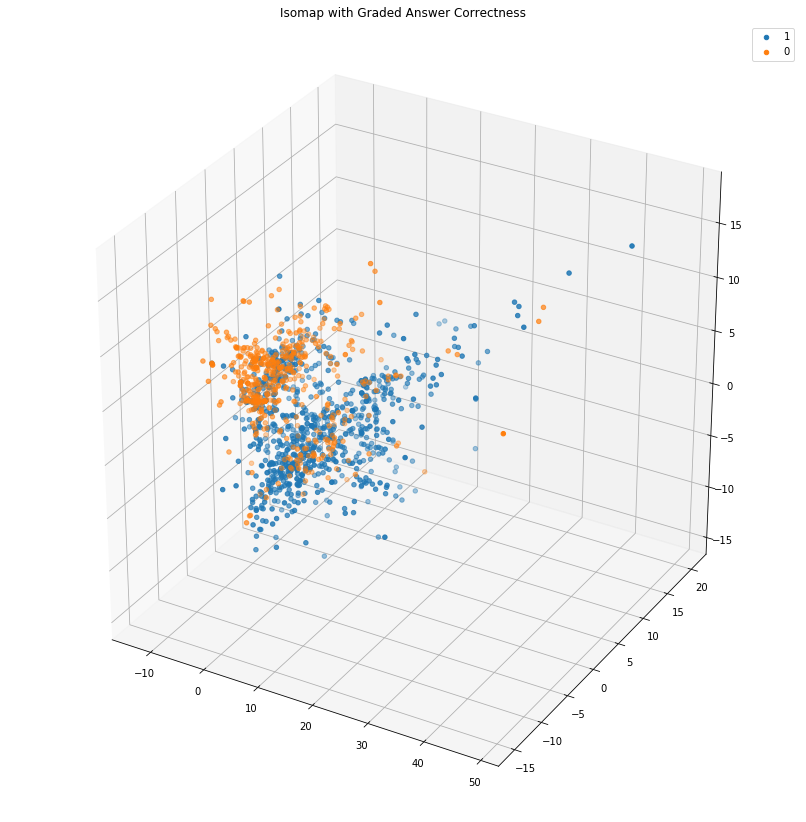

In [72]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Correctness')
plt.show()

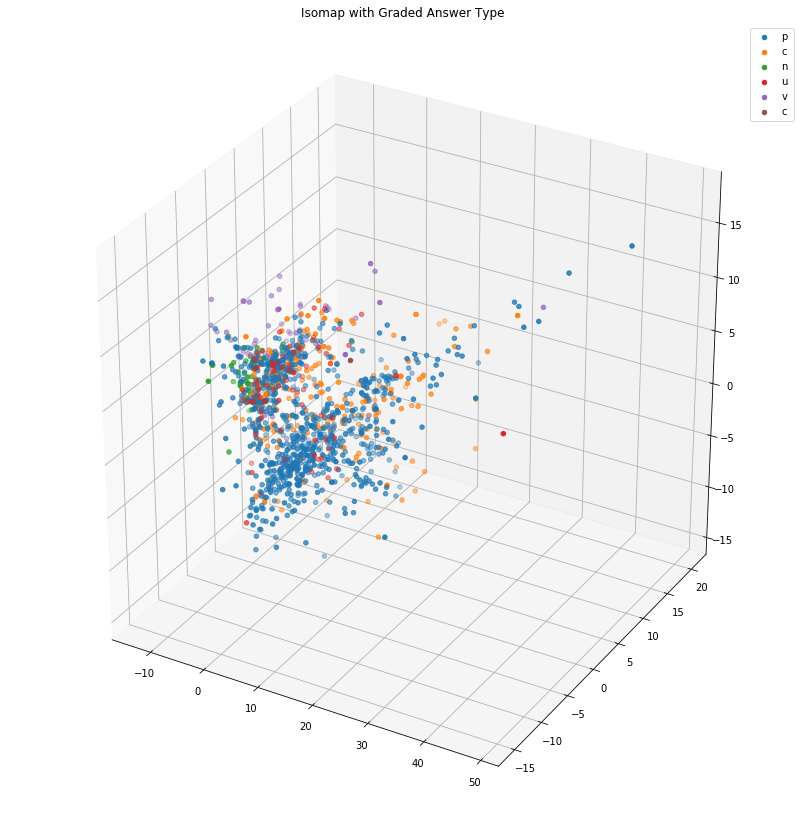

In [73]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['answerType'].value_counts().index:
    mask = data['answerType'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Graded Answer Type')
plt.show()

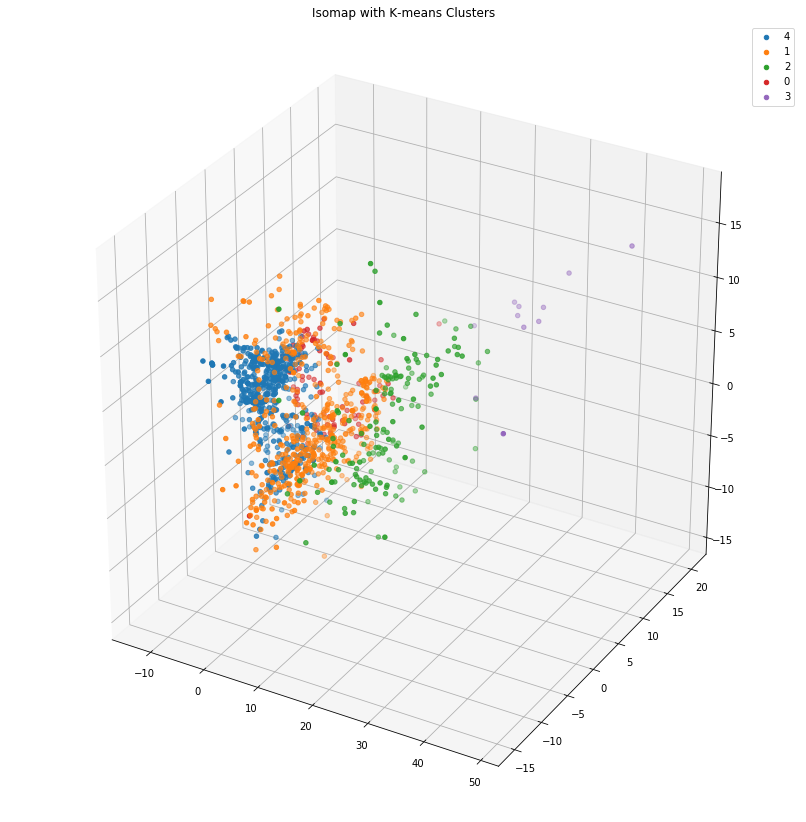

In [74]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

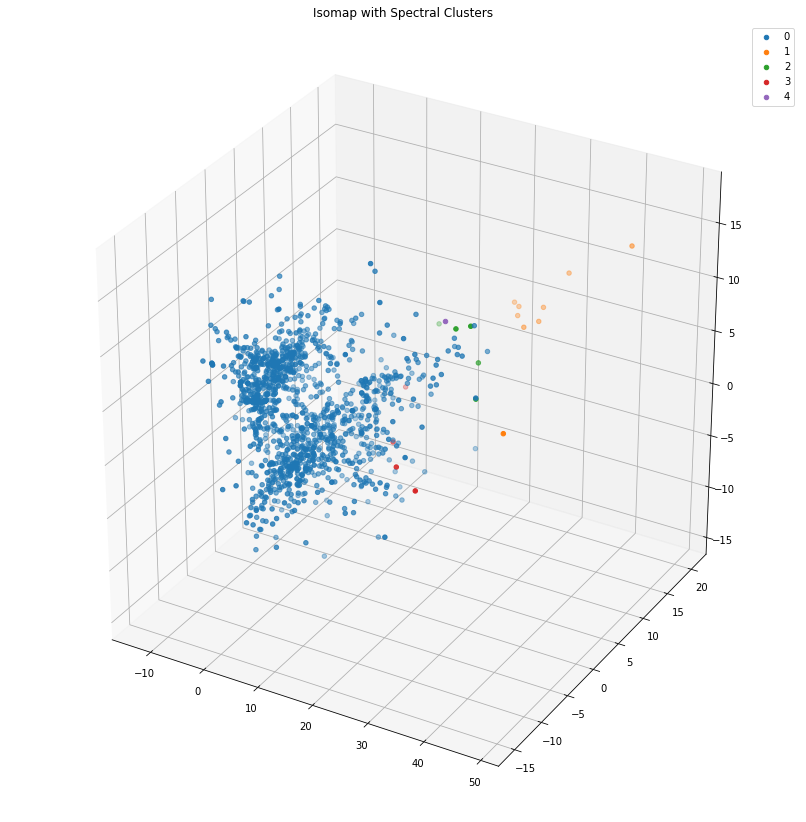

In [75]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

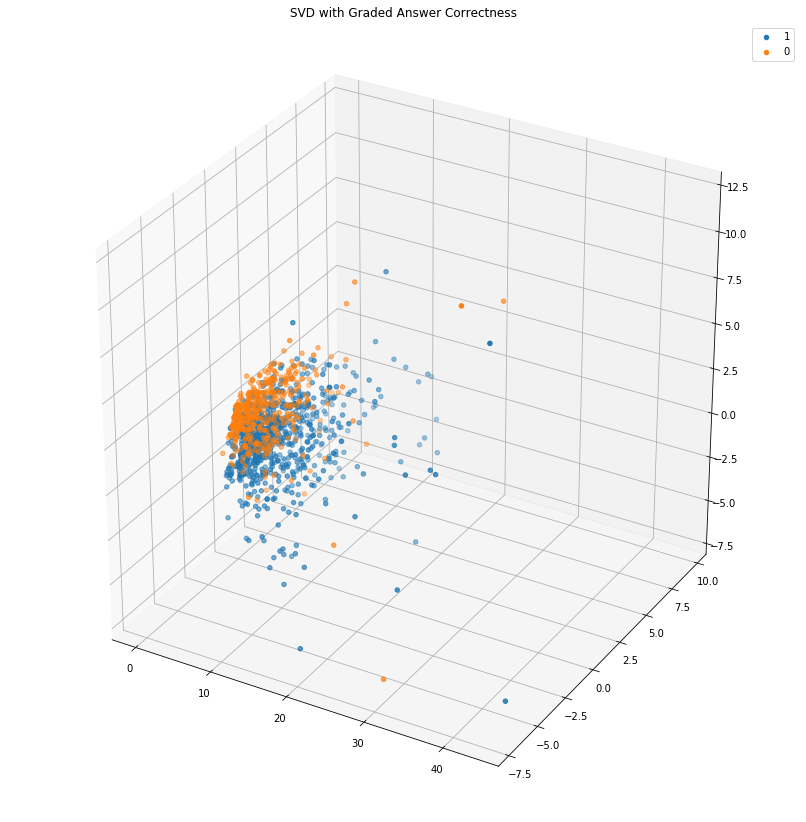

In [76]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['correctness'].value_counts().index:
    mask = data['correctness'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Graded Answer Correctness')
plt.show()

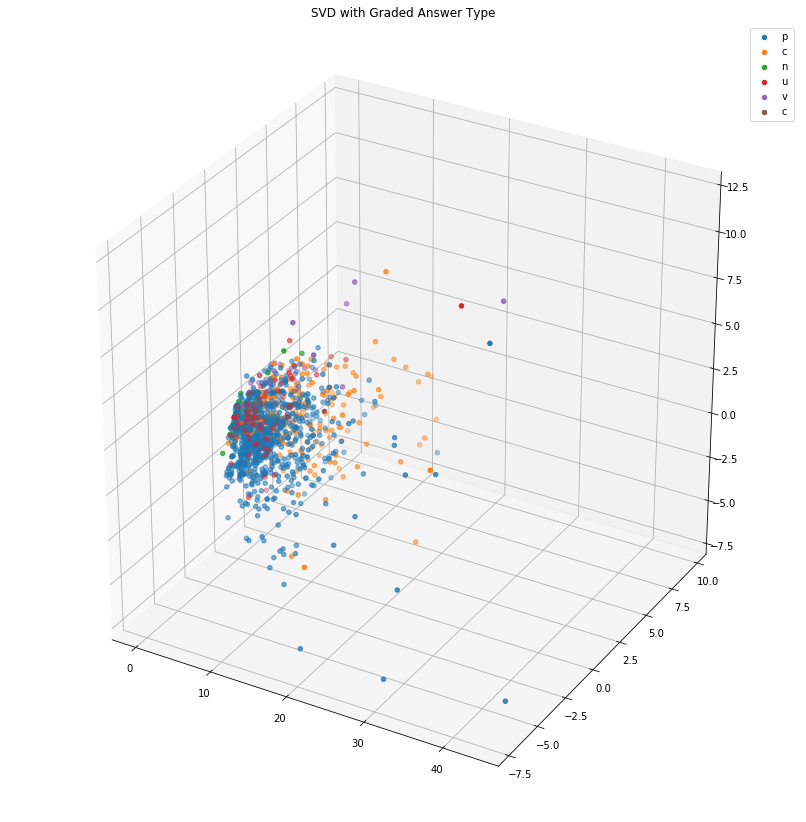

In [77]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['answerType'].value_counts().index:
    mask = data['answerType'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Graded Answer Type')
plt.show()

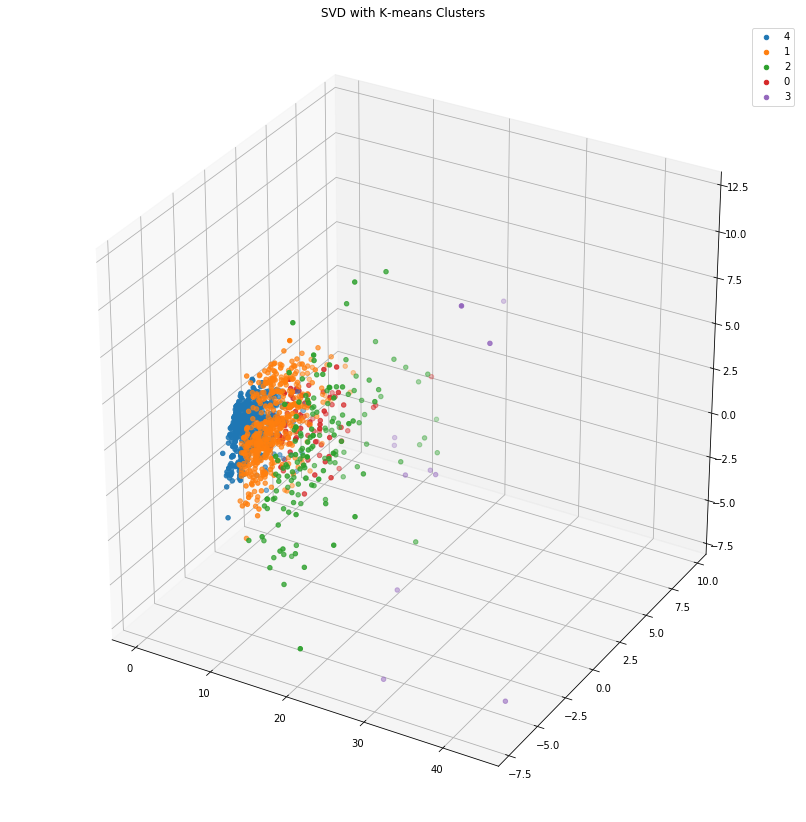

In [78]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

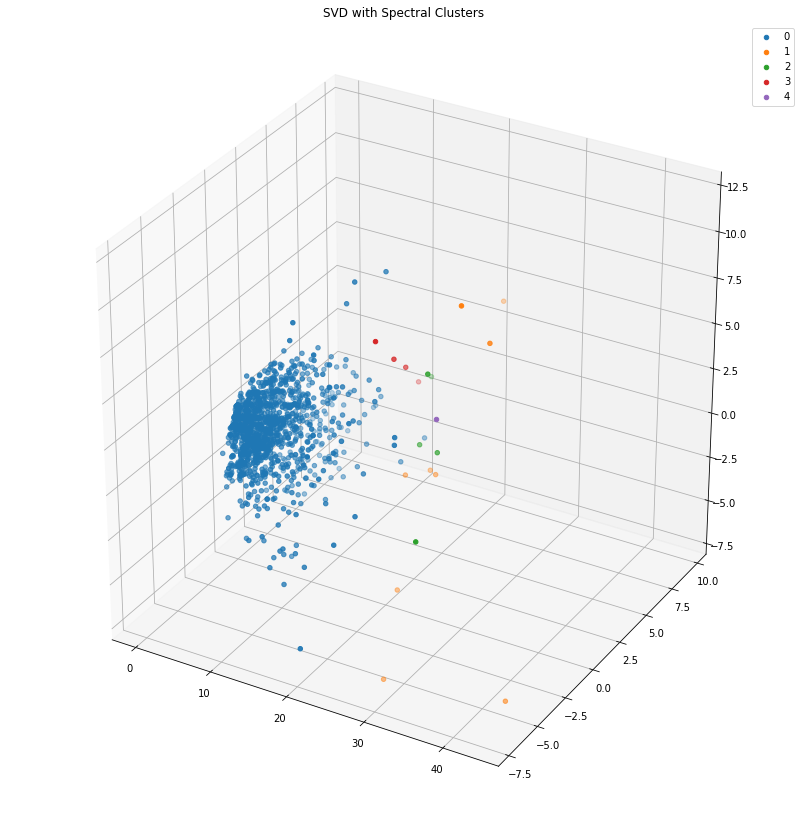

In [79]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()

In [80]:
sklearn.metrics.homogeneity_completeness_v_measure(list(data['km_cluster']), list(data['answerType']), beta=1.0)

(0.08582209025954894, 0.08684341125263245, 0.08632973018579211)